In [18]:
import petsc4py
from petsc4py import PETSc

import underworld3 as uw
from underworld3.systems import Stokes
from underworld3 import function
import numpy as np

import matplotlib.pyplot as plt
import pyvista as pv
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def load_swarm_uw3(output_path,load_step,swarmName):
    swarmFilename =  f"{output_path}{swarmName}_{load_step:05d}.xmf"
    swarmData = pv.XdmfReader(swarmFilename).read()
    particleCoordinates = swarmData.points
#     x1,y1 = particleCoordinates[:,0],particleCoordinates[:,1]
#     zipxy = zip(x1,y1)
#     zipxy = sorted(zipxy)
#     x2,y2 = zip(*zipxy) 
#     particleCoordinates[:,0] = x2 
#     particleCoordinates[:,1] = y2
    return particleCoordinates

def load_mesh_var_uw3(output_path,load_step,var_name):
    pv_mesh_data = pv.XdmfReader(output_path + f'_step_{load_step:05d}.xdmf').read()
    var_d =  pv_mesh_data[var_name]
    return var_d

In [3]:
def load_depth_uw3(fdir,maxstep,dstep,tracer_name):
    depth_l = []
    depth_r = []
    time_l = []
    for step in range(0,maxstep+1,dstep):
        load_step = f"{step:05d}" 
        #swarmCopy= uw.swarm.Swarm(mesh)
        swarmName  = tracer_name
        swarmFilename =  f"{fdir}{swarmName}_{load_step}.xmf"
        swarmData = pv.XdmfReader(swarmFilename).read()
        xcoord,ycoord= swarmData.points[:,0],swarmData.points[:,1]
        np.where(xcoord== xcoord.min())
        
        pv_mesh_data = pv.XdmfReader(fdir + f'_step_{load_step}.xdmf').read()
        time_d =  pv_mesh_data['time_time'][0]

        depth_l.append(ycoord[np.where(xcoord== xcoord.min())])   
        depth_r.append(ycoord[np.where(xcoord== xcoord.max())])  
        time_l.append(time_d)  
    return np.array(depth_l),np.array(depth_r),time_l

In [4]:
fdir1 = "op_Kaus2010RTI_FreeSlip_uw3_levelset/"
fdir2 = "output_Kaus2010RTI_FreeSlip_uw3_GAUSS/" 
fdir3 = "op_Kaus2010RTI_FreeSlip_uw3_levelset_diff/"

In [5]:
maxsteps1,dstep1 = 144,1
depth1_l,depth1_r,times1 = load_depth_uw3(fdir1,maxsteps1,dstep1,"interfaceSwarm")

maxsteps2,dstep2 = 145,1
depth2_l,depth2_r,times2 = load_depth_uw3(fdir2,maxsteps2,dstep2,"surfaceSwarm")

maxsteps3,dstep3 = 144,1
depth3_l,depth3_r,times3 = load_depth_uw3(fdir3,maxsteps3,dstep3,"interfaceSwarm")

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciviz-ci/ThirdParty/xdmf2/vtkxdmf2/libsrc/XdmfAttribute.cxx line 183 (Unknown Attribute Type None)
XDMF Error in /builds/gitlab-kitware-sciv

In [ ]:
loadstep1 = 144
loadstep3 = 144
loadstep2 = 144

# loadstep1 = maxsteps1
# loadstep2 = maxsteps2
# loadstep3 = maxsteps3

interface_load1 = load_swarm_uw3(fdir1,loadstep1,"interfaceSwarm")*100
time_load1 =  load_mesh_var_uw3(fdir1,loadstep1,"time_time").data[0] 

interface_load2 = load_swarm_uw3(fdir2,loadstep2,"surfaceSwarm")*100
time_load2 =  load_mesh_var_uw3(fdir2,loadstep2,"time_time").data[0] 


interface_load3 = load_swarm_uw3(fdir3,loadstep3,"interfaceSwarm")*100
time_load3 =  load_mesh_var_uw3(fdir3,loadstep3,"time_time").data[0] 

print(time_load1,time_load2)

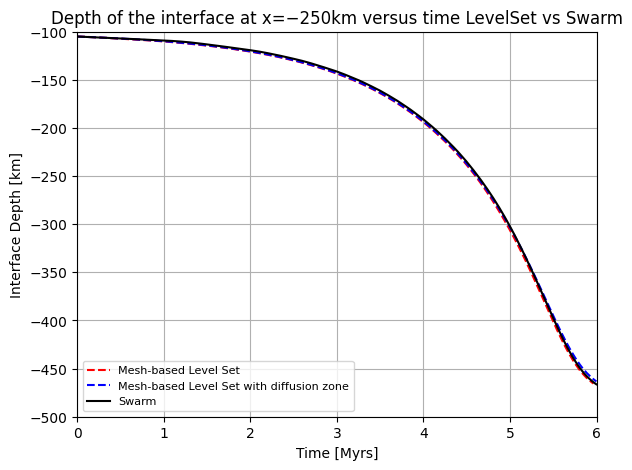

In [37]:
fname = "Depth of the interface at x=−250km versus time LevelSet vs Swarm"
fig, ax1 = plt.subplots(nrows=1, figsize=(6.7,5))
ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') 
ax1.set_title(fname)
ax1.plot(times1,depth1_l*100,'--r',label="Mesh-based Level Set")
ax1.plot(times3,depth3_l*100,'--b',label="Mesh-based Level Set with diffusion zone")
ax1.plot(times2,depth2_l*100,'-k',label="Swarm")
ax1.set_ylim([-500,-100])
ax1.set_xlim([0,6])
ax1.grid()
ax1.legend(loc = 'lower left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')

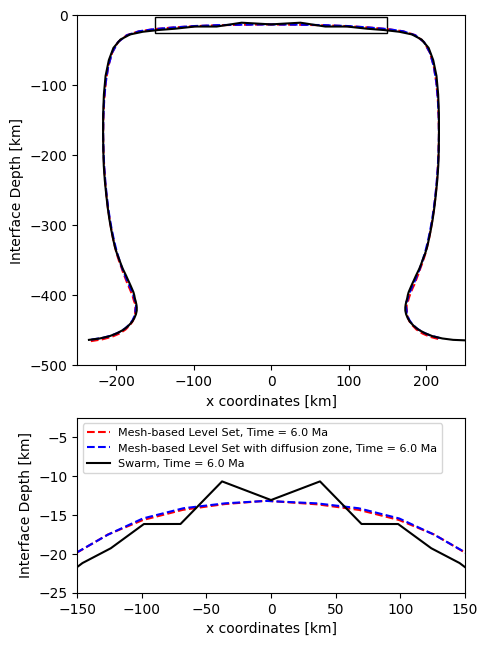

In [43]:
fname = f'The interface of final step_uw3_LevelSet_Swarm Time = {str(np.round(time_load2,3))} Ma.png'
fname_save = fname +".png"
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(5,7.5),gridspec_kw={'height_ratios': [2, 1]})
#ax1.set_title(fname)
ax1.set(xlabel='x coordinates [km]', ylabel='Interface Depth [km]') 
ax1.plot(interface_load1[1:,0],interface_load1[1:,1],'--r',label=f"Mesh-based Level Set Time = {str(np.round(time_load2,3))} Ma")
ax1.plot(interface_load3[1:,0],interface_load3[1:,1],'--b',label=f"Mesh-based Level Set with diffusion zone Time = {str(np.round(time_load2,3))} Ma")
ax1.plot(interface_load2[1:,0],interface_load2[1:,1],'-k',label=f"Swarm Time = {str(np.round(time_load2,3))} Ma")

rc_x1 = -150
rc_x2 = 150
rc_w = rc_x2-rc_x1
rc_y1 = -25
rc_y2 = -2.5
rc_h = rc_y2-rc_y1

ax1.add_patch(patches.Rectangle((rc_x1,rc_y1),rc_w,rc_h,fill=False,edgecolor='k'))
ax1.set_ylim([-500,-0])
ax1.set_xlim([-250,250])
# ax1.grid()
#ax1.legend(loc = 'lower left',prop = {'size':8})


ax2.set(xlabel='x coordinates [km]', ylabel='Interface Depth [km]') 
ax2.plot(interface_load1[1:,0],interface_load1[1:,1],'--r',label=f"Mesh-based Level Set, Time = {str(np.round(time_load2,1))} Ma")
ax2.plot(interface_load3[1:,0],interface_load3[1:,1],'--b',label=f"Mesh-based Level Set with diffusion zone, Time = {str(np.round(time_load2,1))} Ma")
ax2.plot(interface_load2[1:,0],interface_load2[1:,1],'-k',label=f"Swarm, Time = {str(np.round(time_load2,1))} Ma")

ax2.set_xlim([rc_x1,rc_x2]) 
ax2.set_ylim([rc_y1,rc_y2]) 
# ax2.grid()
ax2.legend(loc = 'upper left',prop = {'size':8})

plt.savefig(fname_save,dpi=150,bbox_inches='tight')